In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Load the data
data = pd.read_csv("monthly_sales.csv", parse_dates=["date"])

In [3]:
# Display the first few rows of the dataset
print(data.head())

        date  value
0 2015-01-01    200
1 2015-02-01    180
2 2015-03-01    210
3 2015-04-01    190
4 2015-05-01    220


In [5]:
# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
date     0
value    0
dtype: int64


In [6]:
# Convert the date column to a datetime type
data['date'] = pd.to_datetime(data['date'])

In [7]:
# Set the date column as the index
data.set_index('date', inplace=True)

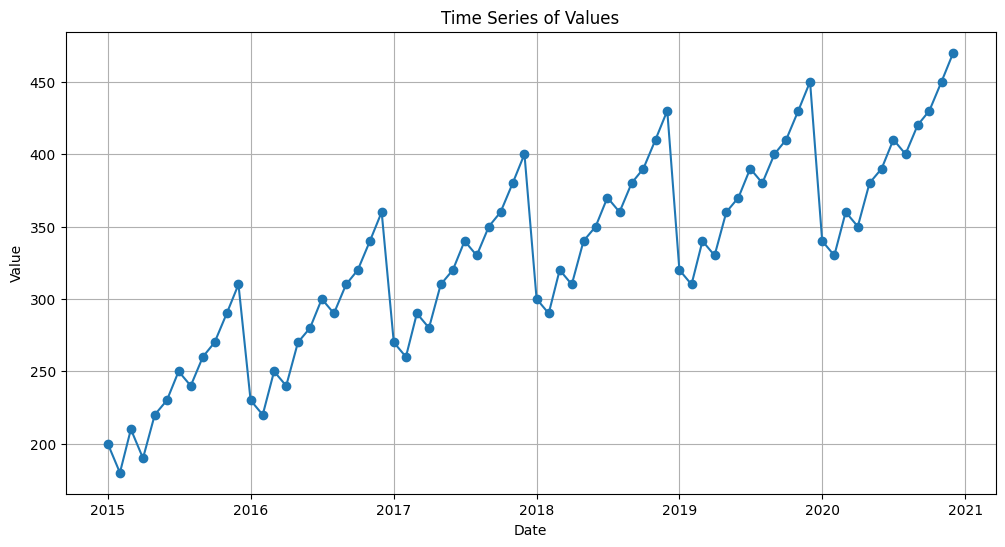

In [8]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(data, marker='o', linestyle='-')
plt.title('Time Series of Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [9]:
# Decompose the time series
decomposition = seasonal_decompose(data['value'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

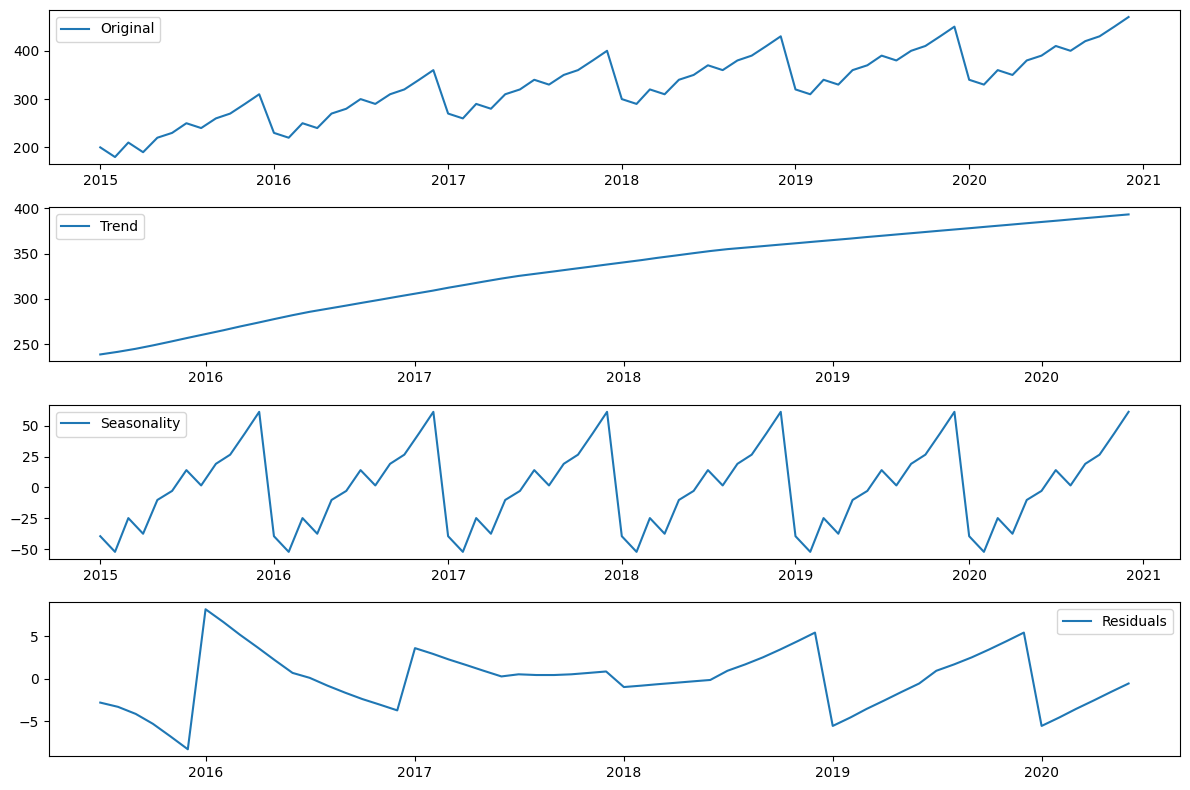

In [10]:
# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

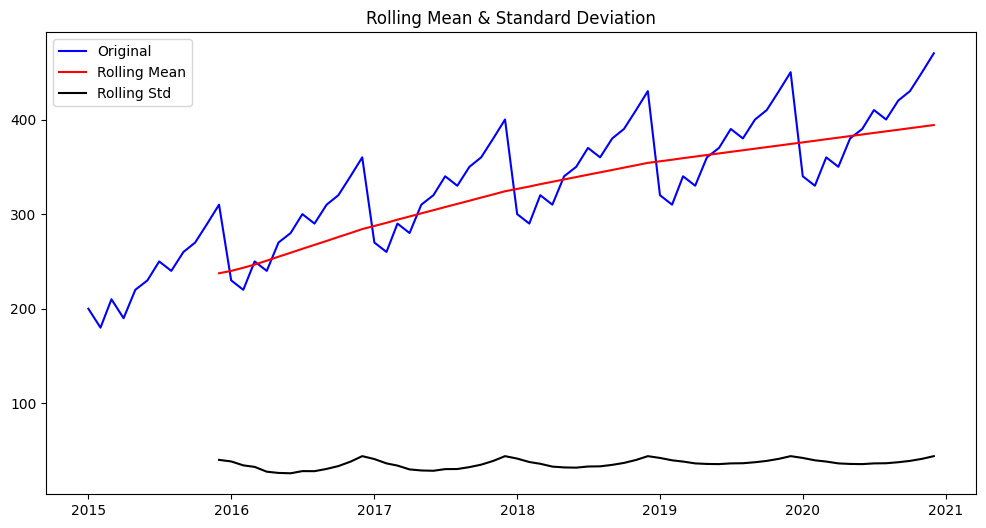

In [12]:
# Plotting Rolling Statistics
rolmean = data.rolling(window=12).mean()
rolstd = data.rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(data, color='blue', label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

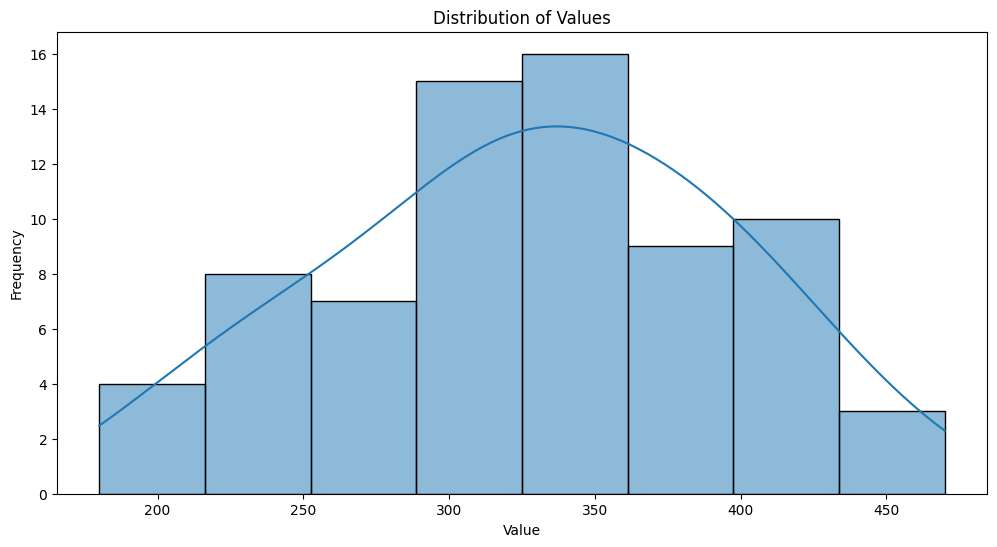

In [13]:
# Distribution of values
plt.figure(figsize=(12, 6))
sns.histplot(data['value'], kde=True)
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

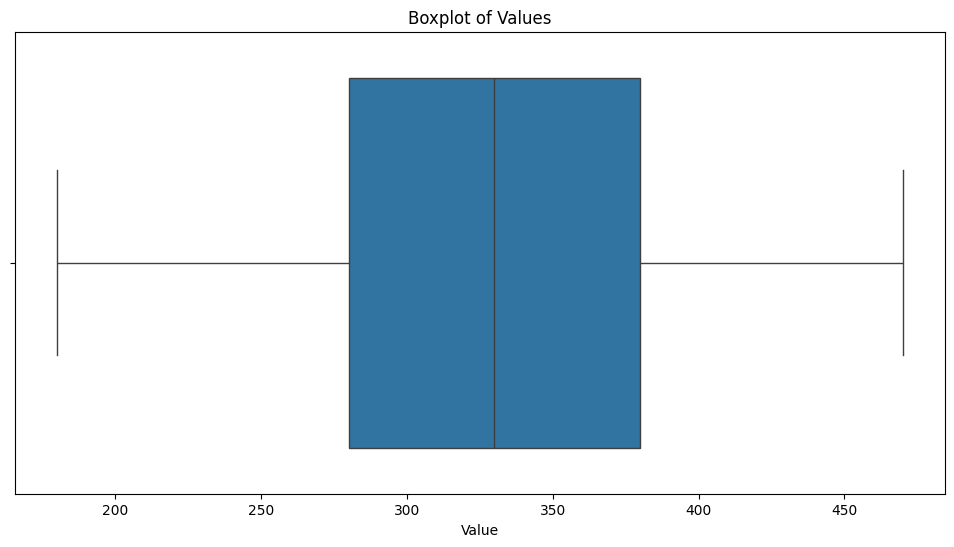

In [14]:
# Boxplot to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['value'])
plt.title('Boxplot of Values')
plt.xlabel('Value')
plt.show()


Correlation matrix:
       value
value    1.0


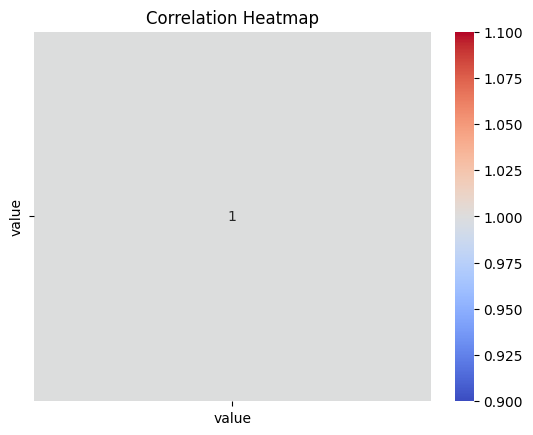

In [15]:
# Correlation between the data points
correlation_matrix = data.corr()
print("\nCorrelation matrix:")
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()